<a href="https://colab.research.google.com/github/ChristianParsons98/PG_Lab_Code/blob/main/YBCO1_Raman_Peaks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%matplotlib inline
from sympy import init_printing
init_printing(use_latex=True)
from IPython.display import display
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import sympy as sp
import pandas as pd
import math
import scipy
from scipy.stats import chisquare
print(scipy.__version__)
from scipy.optimize import leastsq
from scipy.special import voigt_profile
from sklearn.metrics import r2_score
import csv

# This document is used to Find the Center and FWHM of Raman Peaks
# Uses the file 'YBCO1.PRN' to get the Best fit values for Raman Peaks


1.15.3


In [46]:
def Load_Raman_Data(file_path):
    #Function to load tab-delimited .PRN Raman data from Renishaw
    df = pd.read_csv(file_path, delimiter='\t', header=None, names=['wavenumber', 'intensity'])
    return df

#Load the file file
df = Load_Raman_Data('YBCO1.PRN')

#Quick look at the data to make sure everything worked as expected.
print("\nFirst 5 rows:")
print(df.head())

#There is a strange hidden character at the end of the file, so we need to skip the last entry here.
wn = df['wavenumber'].to_numpy()
wn = wn[:-1].astype(float)
intensity = df['intensity'].to_numpy()[:-1]


First 5 rows:
  wavenumber  intensity
0     149.44     441.66
1     150.48     450.10
2     151.52     427.09
3     152.56     394.46
4      153.6     401.27


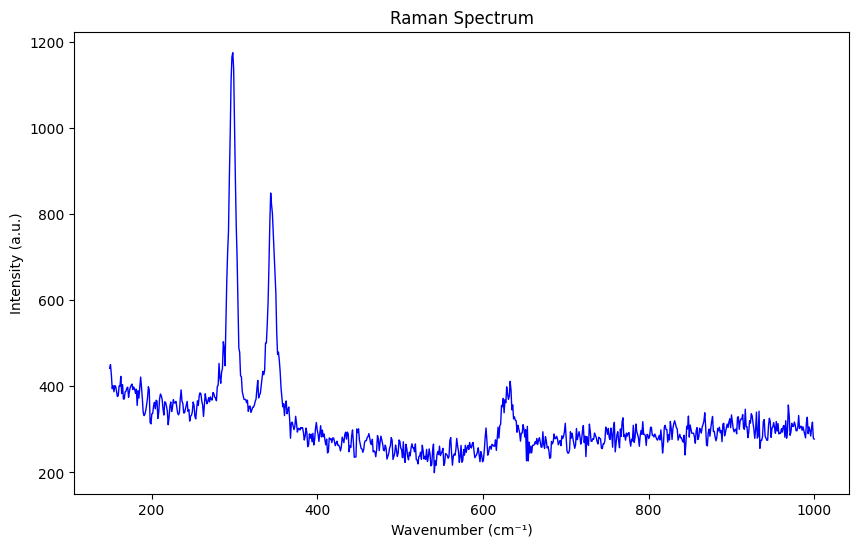

In [97]:
#Plot the data
plt.figure(figsize=(10, 6))
plt.plot(wn, intensity, 'b-', linewidth=1)
plt.xlabel('Wavenumber (cm⁻¹)')
plt.ylabel('Intensity (a.u.)')
plt.title('Raman Spectrum')
#plt.xlim(600,700)
#plt.ylim(250,450)
plt.show()

In [81]:
#helper function to find index closest to my guess angle
def closest(lst, K):
    val=lst[min(range(len(lst)), key = lambda i: abs(lst[i]-K))]
    return lst.index(val)

#helper function to find index of nearest peak given a guess index
def peakfind(lst,K):
    temp=lst[K-15:K+15]
    maxval=max(temp)
    mindx=temp.index(maxval)
    #index = lst.index(maxval)
    index=K-15+mindx
    return index

#This function returns the Voigt FWHM given best fit sigma and gamma.
def VoigtFWHM(sigma,gamma):
    fN=2.*sigma*np.sqrt(2.*np.log(2.))
    fC=2.*gamma
    VB = 0.5346*fC+np.sqrt(0.2166*(fC**2.)+(fN**2.))
    return VB

def fitVoigt(x,sigma,gamma,a,offset):
    return a*voigt_profile(x-offset,sigma,gamma)


#This function does a lot
#x is the list form of Ang (nparray), y is the list form of Int (nparray)
def GetFWHM(Ang,Int,center,nleft,nright):
    x=Ang.tolist()
    y=Int.tolist()
    pki= peakfind(y,closest(x,center))
    pkang= Ang[pki]
    tempx=Ang[pki-nleft:pki+nright]
    tempy=Int[pki-nleft:pki+nright]
    tempx=tempx-pkang

    popt, pcov = curve_fit(fitVoigt, tempx, tempy,maxfev=4000)

    temptitle= 'Raman peak centered at Wavenumber = '+str(pkang)[0:6]

    xsim=np.linspace(tempx[0],tempx[-1],100)
    plt.scatter(tempx,tempy)
    plt.plot(xsim,fitVoigt(xsim,*popt),'r')
    plt.title(temptitle)
    plt.xlabel('Wavenumber offset from peak center (cm-1)')
    plt.ylabel('Intensity (Arbitrary Units)')
    plt.show()

    sigma = popt[0]
    gamma = popt[1]
    VFW= VoigtFWHM(sigma,gamma)
    #print(popt[0:2])

    return [pkang,VFW,pcov]


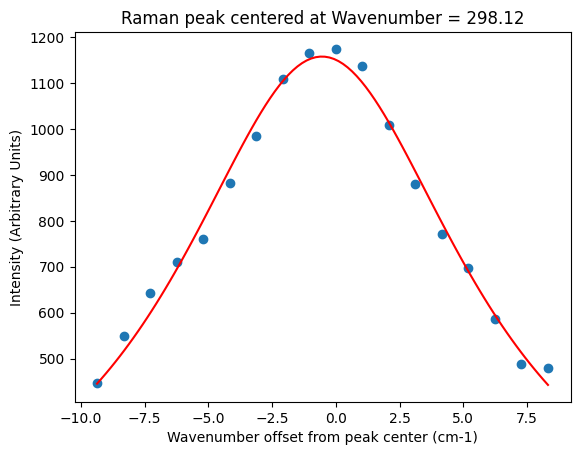

In [85]:
Rama1= GetFWHM(wn, intensity,300,9,9)

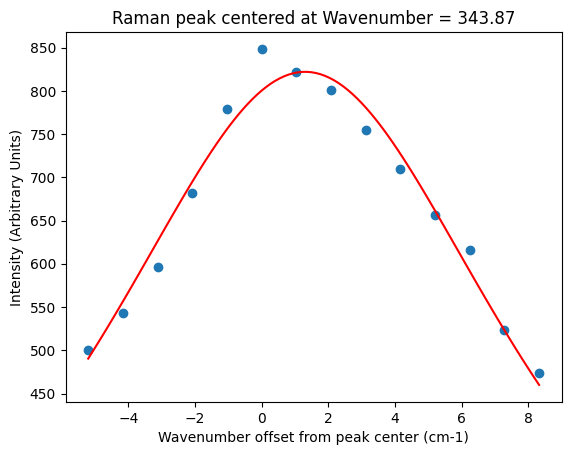

In [86]:
Rama2= GetFWHM(wn, intensity,345,5,9)

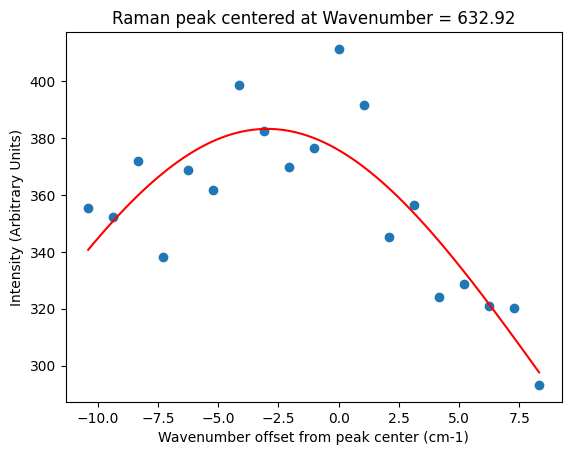

In [87]:
Rama3= GetFWHM(wn, intensity,630,10,9)

In [96]:
print('Raman Peak #1')
print('Peak Centered at: ',Rama1[0])
print('Peak FWHM: ',Rama1[1])
print('\n')

print('Raman Peak #2')
print('Peak Centered at: ',Rama2[0])
print('Peak FWHM: ',Rama2[1])
print('\n')


print('Raman Peak #3')
print('Peak Centered at: ',Rama3[0])
print('Peak FWHM: ',Rama3[1])

Raman Peak #1
Peak Centered at:  298.12
Peak FWHM:  13.954333923132072


Raman Peak #2
Peak Centered at:  343.87
Peak FWHM:  15.817892313896676


Raman Peak #3
Peak Centered at:  632.92
Peak FWHM:  42.094745517357865
